<a href="https://colab.research.google.com/github/rawanshendy2/CNN-LSTM/blob/main/Final_CNN_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LSTM, TimeDistributed
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
import cv2
import os
import zipfile
import shutil
import matplotlib.pyplot as plt


In [20]:
import os
import shutil
from google.colab import files

uploaded = files.upload()

for filename in uploaded.keys():
    if "kaggle" in filename and filename.endswith(".json"):
        correct_filename = filename
        break
else:
    print("❌ لم يتم العثور على ملف kaggle.json، حاول مرة أخرى!")
    correct_filename = None

if correct_filename:
    new_path = "/root/.kaggle/kaggle.json"
    os.makedirs("/root/.kaggle", exist_ok=True)
    shutil.move(f"/content/{correct_filename}", new_path)
    os.chmod(new_path, 0o600)
    print(f"✅ تم إعادة تسمية {correct_filename} إلى kaggle.json ونقله بنجاح!")

    # اختبار Kaggle API
    !kaggle datasets list
else:
    print("❌ لم يتم نقل الملف، تأكد من رفع kaggle.json بشكل صحيح.")


Saving kaggle (3).json to kaggle (3).json
✅ تم إعادة تسمية kaggle (3).json إلى kaggle.json ونقله بنجاح!
ref                                                                    title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
atharvasoundankar/chocolate-sales                                      Chocolate Sales Data 📊🍫                                  14473  2025-03-19 03:51:40.270000           9856        169  1.0              
abdulmalik1518/mobiles-dataset-2025                                    Mobiles Dataset (2025)                                   20314  2025-02-18 06:50:24.370000          16090        277  1.0              
zahidmughal2343/employee-data                                       

In [21]:
!kaggle datasets download -d ismailnasri20/driver-drowsiness-dataset-ddd


Dataset URL: https://www.kaggle.com/datasets/ismailnasri20/driver-drowsiness-dataset-ddd
License(s): unknown
driver-drowsiness-dataset-ddd.zip: Skipping, found more recently modified local copy (use --force to force download)


In [22]:
!unzip driver-drowsiness-dataset-ddd.zip -d dataset


Archive:  driver-drowsiness-dataset-ddd.zip
replace dataset/Driver Drowsiness Dataset (DDD)/Drowsy/A0001.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: no
replace dataset/Driver Drowsiness Dataset (DDD)/Drowsy/A0002.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: no
replace dataset/Driver Drowsiness Dataset (DDD)/Drowsy/A0003.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: no
replace dataset/Driver Drowsiness Dataset (DDD)/Drowsy/A0004.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: no
replace dataset/Driver Drowsiness Dataset (DDD)/Drowsy/A0005.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: no
replace dataset/Driver Drowsiness Dataset (DDD)/Drowsy/A0006.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: no
replace dataset/Driver Drowsiness Dataset (DDD)/Drowsy/A0007.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: no
replace dataset/Driver Drowsiness Dataset (DDD)/Drowsy/A0008.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: no
replace dataset/Driver Drowsiness Dataset (DDD)/Drowsy/A0009.png? [y]es, [n]o, [A]ll, [N]one, [r]ena

In [23]:
!pip install mediapipe
import pandas as pd
import cv2
import numpy as np
import mediapipe as mp
import os
import shutil
import matplotlib.pyplot as plt
import mediapipe as mp

mp_facemesh = mp.solutions.face_mesh
mp_drawing  = mp.solutions.drawing_utils
denormalize_coordinates = mp_drawing._normalized_to_pixel_coordinates

%matplotlib inline

In [24]:
!mkdir -p ~/.kaggle
!echo '{"username":"rawanshendy","key":"4c12bd812d5e771f9f50035689c28b90"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d rakibuleceruet/drowsiness-prediction-dataset
!unzip drowsiness-prediction-dataset.zip -d /content/

import os
print("📂 الملفات داخل /content/:", os.listdir("/content/"))

Dataset URL: https://www.kaggle.com/datasets/rakibuleceruet/drowsiness-prediction-dataset
License(s): unknown
drowsiness-prediction-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  drowsiness-prediction-dataset.zip
replace /content/0 FaceImages/Active Subjects/image_0 (10).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: /content/0 FaceImages/Active Subjects/image_0 (10).jpg  
replace /content/0 FaceImages/Active Subjects/image_0 (15).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: /content/0 FaceImages/Active Subjects/image_0 (15).jpg  
replace /content/0 FaceImages/Active Subjects/image_0 (3).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: /content/0 FaceImages/Active Subjects/image_0 (3).jpg  
replace /content/0 FaceImages/Active Subjects/image_0 (4).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: /content/0 FaceImages/Active Subjects/image_0 (4).jpg  
replace /content/0 FaceImages

In [25]:
!kaggle datasets download -d rakibuleceruet/drowsiness-prediction-dataset --force
!unzip -o drowsiness-prediction-dataset.zip -d /content/


Streaming output truncated to the last 5000 lines.
  inflating: /content/0 FaceImages/Active Subjects/img_k_11970.jpg  
  inflating: /content/0 FaceImages/Active Subjects/img_k_120.jpg  
  inflating: /content/0 FaceImages/Active Subjects/img_k_1200.jpg  
  inflating: /content/0 FaceImages/Active Subjects/img_k_12000.jpg  
  inflating: /content/0 FaceImages/Active Subjects/img_k_12030.jpg  
  inflating: /content/0 FaceImages/Active Subjects/img_k_12120.jpg  
  inflating: /content/0 FaceImages/Active Subjects/img_k_12150.jpg  
  inflating: /content/0 FaceImages/Active Subjects/img_k_12180.jpg  
  inflating: /content/0 FaceImages/Active Subjects/img_k_12210.jpg  
  inflating: /content/0 FaceImages/Active Subjects/img_k_12240.jpg  
  inflating: /content/0 FaceImages/Active Subjects/img_k_12270.jpg  
  inflating: /content/0 FaceImages/Active Subjects/img_k_1230.jpg  
  inflating: /content/0 FaceImages/Active Subjects/img_k_12300.jpg  
  inflating: /content/0 FaceImages/Active Subjects/img_k

In [26]:
import os

os.makedirs('./Fatigue Subjects', exist_ok=True)
os.makedirs('./Active Subjects', exist_ok=True)


In [27]:
all_left_eye_idxs = list(mp_facemesh.FACEMESH_LEFT_EYE)
all_left_eye_idxs = set(np.ravel(all_left_eye_idxs))

all_right_eye_idxs = list(mp_facemesh.FACEMESH_RIGHT_EYE)
all_right_eye_idxs = set(np.ravel(all_right_eye_idxs))

all_idxs = all_left_eye_idxs.union(all_right_eye_idxs)

chosen_left_eye_idxs  = [362, 385, 387, 263, 373, 380]
chosen_right_eye_idxs = [33,  160, 158, 133, 153, 144]
all_chosen_idxs = chosen_left_eye_idxs + chosen_right_eye_idxs

In [28]:
IMG_SIZE=145
i=0
def draw(
    *,n=i,
    img_dt,cat,
    img_eye_lmks=None,
    img_eye_lmks_chosen=None,
    face_landmarks=None,
    ts_thickness=1,
    ts_circle_radius=2,
    lmk_circle_radius=3,
    name="1",
):
    image_drawing_tool = img_dt

    image_eye_lmks = img_dt.copy() if img_eye_lmks is None else img_eye_lmks

    img_eye_lmks_chosen = img_dt.copy() if img_eye_lmks_chosen is None else img_eye_lmks_chosen

    connections_drawing_spec = mp_drawing.DrawingSpec(
        thickness=ts_thickness,
        circle_radius=ts_circle_radius,
        color=(255, 255, 255)
    )


    mp_drawing.draw_landmarks(
        image=image_drawing_tool,
        landmark_list=face_landmarks,
        connections=mp_facemesh.FACEMESH_TESSELATION,
        landmark_drawing_spec=None,
        connection_drawing_spec=connections_drawing_spec,
    )

    landmarks = face_landmarks.landmark



    for landmark_idx, landmark in enumerate(landmarks):
        if landmark_idx in all_idxs:
            pred_cord = denormalize_coordinates(landmark.x,
                                                landmark.y,
                                                imgW, imgH)
            cv2.circle(image_eye_lmks,
                       pred_cord,
                       lmk_circle_radius,
                       (255, 255, 255),
                       -1
                       )

        if landmark_idx in all_chosen_idxs:
            pred_cord = denormalize_coordinates(landmark.x,
                                                landmark.y,
                                                imgW, imgH)
            cv2.circle(img_eye_lmks_chosen,
                       pred_cord,
                       lmk_circle_radius,
                       (255, 255, 255),
                       -1
                       )

    if cat=='Fatigue Subjects':
        cv2.imwrite(str('./Fatigue Subjects/'+str(n)+'.jpg'), image_drawing_tool)
    else:
        cv2.imwrite(str('./Active Subjects/'+str(n)+'.jpg'), image_drawing_tool)

    resized_array = cv2.resize(image_drawing_tool, (IMG_SIZE, IMG_SIZE))
    return resized_array

In [29]:
imgH, imgW, _=0,0,0
def landmarks(image,category,i):
    resized_array=[]
    IMG_SIZE = 145
    image = np.ascontiguousarray(image)
    imgH, imgW, _ = image.shape

    with mp_facemesh.FaceMesh(
        static_image_mode=True,
        max_num_faces=1,
        refine_landmarks=False,
        min_detection_confidence=0.5,
        min_tracking_confidence= 0.5,) as face_mesh:

        results = face_mesh.process(image)

        if results.multi_face_landmarks:
            for face_id, face_landmarks in enumerate(results.multi_face_landmarks):
                resized_array= draw(img_dt=image.copy(), cat=category, n=i,face_landmarks=face_landmarks)
    return resized_array

In [30]:
import os

active_subjects_path = "/content/0 FaceImages/Active Subjects"
fatigue_subjects_path = "/content/0 FaceImages/Fatigue Subjects"

print("📂 الملفات داخل Active Subjects:", os.listdir(active_subjects_path))
print("📂 الملفات داخل Fatigue Subjects:", os.listdir(fatigue_subjects_path))

📂 الملفات داخل Active Subjects: ['img_h_13680.jpg', 'img_h_300 - Copy.jpg', 'image_720 (2).jpg', 'img_a_930.jpg', 'img_a_1260.jpg', 'img_h_12090.jpg', 'image_5133 (2).jpg', 'img_i_12615.jpg', 'image_2010.jpg', 'img_k_10050.jpg', 'img_i_12267.jpg', 'image__3654 (2).jpg', 'img_h_2460.jpg', 'image_390 (5).jpg', 'img_i_17690.jpg', 'img_h_11070.jpg', 'img_h_13140.jpg', 'img_i_6380.jpg', 'img_h_4230.jpg', 'img_k_5580.jpg', 'img_f_17661.jpg', 'img_k_13350.jpg', 'img_h_9870.jpg', 'img_f_11977.jpg', 'image_1500 (4).jpg', 'img_k_30.jpg', 'img_h_7680 - Copy.jpg', 'img_i_14732.jpg', 'img_f_4611.jpg', 'img_k_3150.jpg', 'image_2088 (3).jpg', 'image_1980 (3).jpg', 'img_i_14616.jpg', 'img_h_12570.jpg', 'img_e_3150.jpg', 'img_i_14413.jpg', 'img_j_87.jpg', 'image_1350 (6).jpg', 'img_h_17130.jpg', 'img_k_8640.jpg', 'img_i_5220.jpg', 'image_810 (4).jpg', 'image_0225.jpg', 'img_i_3277.jpg', 'image_6032.jpg', 'img_i_16762.jpg', 'img_h_8580.jpg', 'img_h_10020.jpg', 'img_e_1276.jpg', 'img_c_1798.jpg', 'image_

In [31]:
import cv2

face_cascade = cv2.CascadeClassifier("/content/haarcascade_frontalface_default.xml")

if face_cascade.empty():
    print("❌ ملف كاشف الوجه غير موجود أو تالف!")
else:
    print("✅ ملف كاشف الوجه تم تحميله بنجاح!")

✅ ملف كاشف الوجه تم تحميله بنجاح!


In [32]:
import urllib.request

url = "https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_frontalface_default.xml"
save_path = "/content/haarcascade_frontalface_default.xml"

urllib.request.urlretrieve(url, save_path)

if os.path.exists(save_path):
    print("✅ تم تنزيل ملف Haar Cascade بنجاح!")
else:
    print("❌ فشل التنزيل، حاول مرة أخرى!")


✅ تم تنزيل ملف Haar Cascade بنجاح!


In [33]:
import cv2

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

if face_cascade.empty():
    print("❌ لم يتم تحميل ملف كاشف الوجه!")
else:
    print("✅ تم تحميل ملف كاشف الوجه بنجاح!")


✅ تم تحميل ملف كاشف الوجه بنجاح!


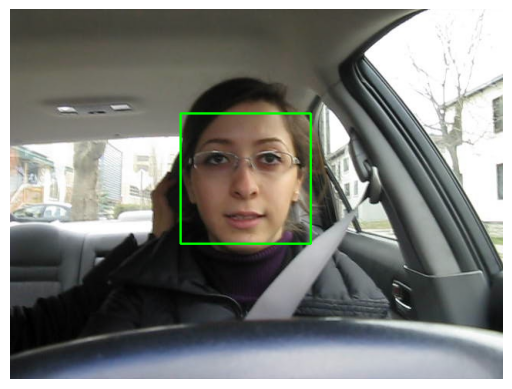

In [34]:
import cv2
import matplotlib.pyplot as plt

test_image_path = "/content/0 FaceImages/Active Subjects/image_0 (10).jpg"
image = cv2.imread(test_image_path)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

face_cascade = cv2.CascadeClassifier("/content/haarcascade_frontalface_default.xml")

faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [35]:
!pip install mediapipe


In [37]:
def face_for_yawn(direc="/content/0 FaceImages", face_cas_path="/content/haarcascade_frontalface_default.xml"):
    yaw_no=[]
    i=1
    IMG_SIZE = 145
    categories = ["Fatigue Subjects", "Active Subjects"]
    for category in categories:
        path_link = os.path.join(direc, category)
        class_num1 = categories.index(category)
        print(class_num1)
        for image in os.listdir(path_link):
            image_array = cv2.imread(os.path.join(path_link, image), cv2.IMREAD_COLOR)
            face_cascade = cv2.CascadeClassifier(face_cas_path)
            faces = face_cascade.detectMultiScale(image_array, 1.3, 5)
            for (x, y, w, h) in faces:
                img = cv2.rectangle(image_array, (x, y), (x+w, y+h), (0, 255, 0), 2)
                roi_color = img[y:y+h, x:x+w]
                land_face_array=landmarks(roi_color,category,i)
                yaw_no.append([land_face_array, class_num1])
                i=i+1
    return yaw_no
yawn_no_yawn = face_for_yawn()

0
1


In [38]:
import cv2

face_cascade = cv2.CascadeClassifier("/content/haarcascade_frontalface_default.xml")
if face_cascade.empty():
    print("Error loading cascade classifier!")


In [39]:
dir_path = r'./Active Subjects'
print("Number of Active images :")
print(len([entry for entry in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, entry))]))

Number of Active images :
3869


In [40]:
dir_path = r'./Fatigue Subjects'
print("Number of Fatigue images :")
print(len([entry for entry in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, entry))]))

Number of Fatigue images :
3669


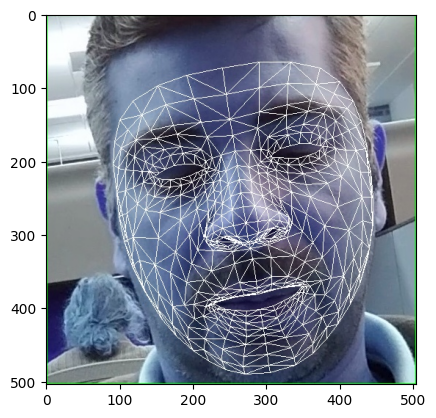

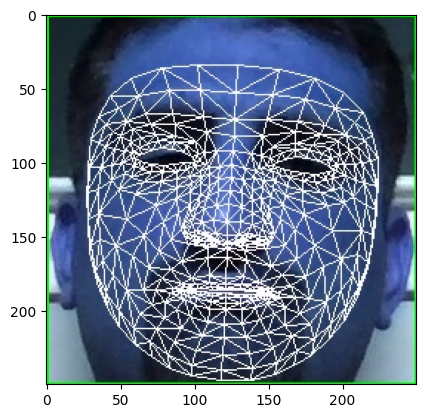

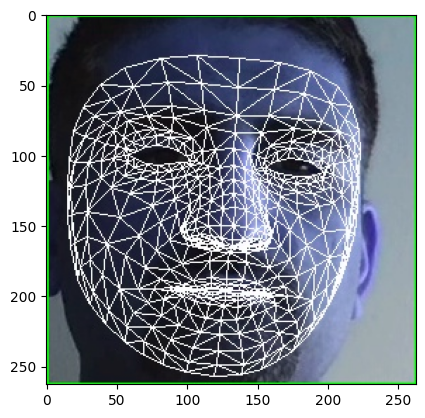

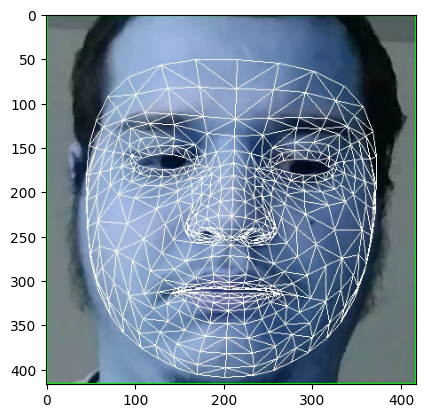

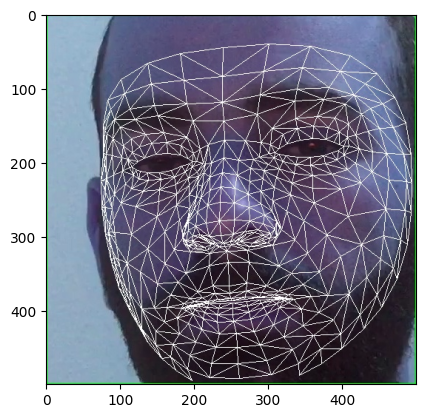

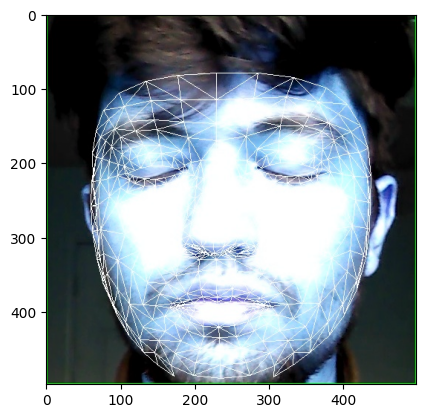

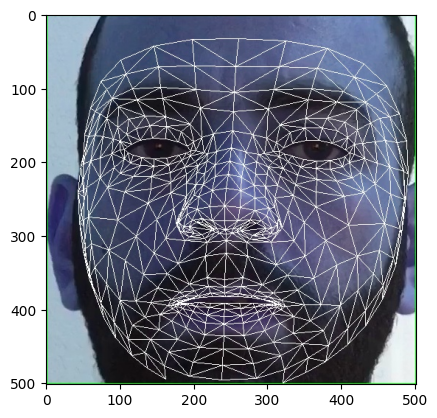

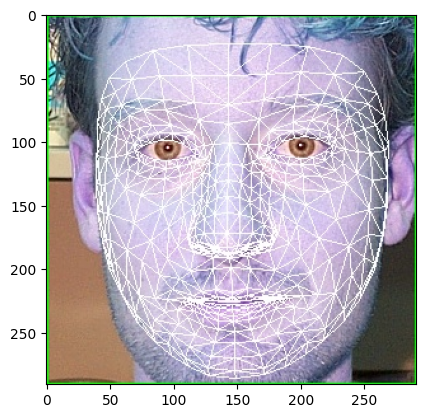

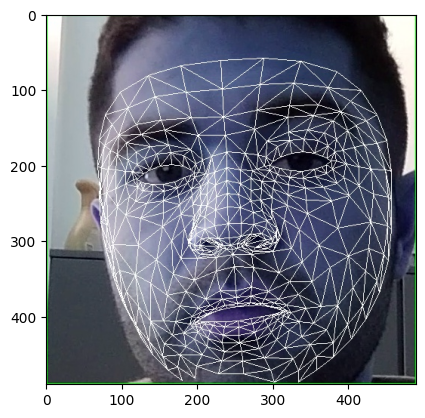

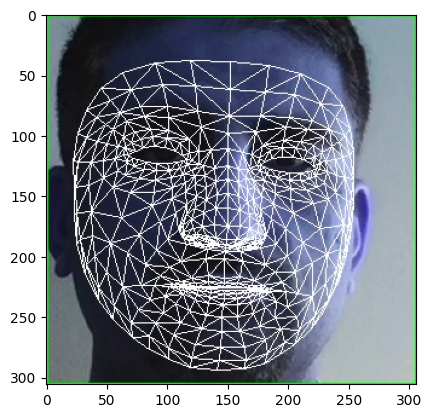

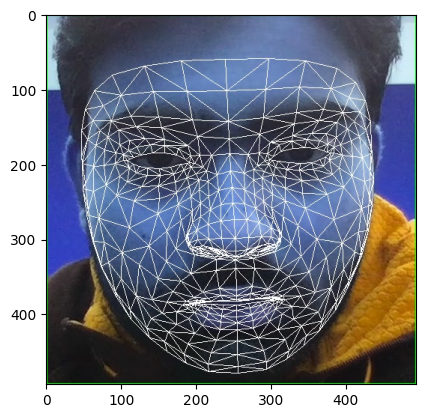

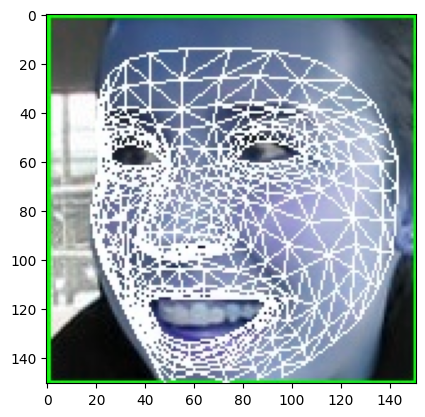

In [41]:
categories = ["Fatigue Subjects", "Active Subjects"]
for category in categories:
  for idx, img in enumerate(os.listdir(f'./{category}')):
      if idx > 5:
        break
      img_file = cv2.imread(f'./{category}/{img}')
      plt.imshow(img_file)
      plt.show()
      plt.close()

In [42]:
import os
import time
def face_for_yawn(direc="./"):
    yaw_no=[]
    i=1
    IMG_SIZE = 145
    categories = ["Fatigue Subjects", "Active Subjects"]
    for category in categories:
        path_link = os.path.join(direc, category)
        class_num1 = categories.index(category)
        print(class_num1)
        for image in os.listdir(path_link):
            image_array = cv2.imread(os.path.join(path_link, image), cv2.IMREAD_COLOR)
            resized_array = cv2.resize(image_array, (IMG_SIZE, IMG_SIZE))
            yaw_no.append([resized_array, class_num1])
                #print('image face number '+str(i))
                #i=i+1
    return yaw_no
yawn_no_yawn = face_for_yawn()

0
1


In [43]:
X = []
y = []
for feature, label in yawn_no_yawn:
    X.append(feature)
    y.append(label)

In [44]:
import numpy as np

X = np.array(X)
X = X.reshape(-1, 145, 145, 3)

In [45]:
from sklearn.preprocessing import LabelEncoder
label_bin = LabelEncoder()
y = label_bin.fit_transform(y)
y = np.array(y)

In [46]:
from sklearn.model_selection import train_test_split
seed = 42
test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, test_size=test_size)

In [47]:
len(X_test)

1508

In [48]:
len(X_train)

6030

In [49]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [50]:
train_generator = ImageDataGenerator(rescale=1/255, zoom_range=0.2, horizontal_flip=True, rotation_range=30)
test_generator = ImageDataGenerator(rescale=1/255)

train_generator = train_generator.flow(np.array(X_train), y_train, shuffle=False)
test_generator = test_generator.flow(np.array(X_test), y_test, shuffle=False)

In [51]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Dense, BatchNormalization, Dropout, GlobalAveragePooling2D, Flatten
)
from tensorflow.keras.optimizers import Adam

# Define the MobileNet as the base model
base_model = MobileNet(
    weights='imagenet',  # Use pre-trained weights
    include_top=False,   # Exclude fully connected layers
    input_shape=(145, 145, 3)
)

# Freeze the base model layers to use them as feature extractors
base_model.trainable = False

# Build the custom model on top of MobileNet
model_input = Input(shape=(145, 145, 3))
x = base_model(model_input)
x = GlobalAveragePooling2D()(x)

# Fully connected layers
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.25)(x)

# Output layer
output = Dense(1, activation='sigmoid')(x)

# Create the final model
model = Model(inputs=model_input, outputs=output)

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Display the model summary
model.summary()

<ipython-input-51-44cda34c49c2>:9: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNet(


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 145, 145, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenet_1.00_224 (Functional)      │ (None, 4, 4, 1024)          │       3,228,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1024)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,369,153 (12.85 MB)

 Trainable params: 139,905 (546.50 KB)

 Non-trainable params: 3,229,248 (12.32 MB)

In [52]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Dense, GlobalAveragePooling2D, Dropout, LSTM, Reshape, BatchNormalization
)
from tensorflow.keras.optimizers import Adam

# Define the MobileNet as the base model
base_model = MobileNet(
    weights='imagenet',  # Use pre-trained weights
    include_top=False,   # Exclude fully connected layers
    input_shape=(224, 224, 3)  # Set to default MobileNet input size
)

# Freeze the base model layers to use them as feature extractors
base_model.trainable = False

# Add new layers for our specific task
model_input = Input(shape=(224, 224, 3))  # Match input shape of MobileNet
x = base_model(model_input)

# Global average pooling layer
x = GlobalAveragePooling2D()(x)  # Output: (batch_size, features)

# Add LSTM-compatible reshaping
x = Reshape((1, -1))(x)  # Reshape to (batch_size, time_steps, features)

# Add LSTM for sequence processing
x = LSTM(64, return_sequences=False)(x)

# Fully connected layers
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.25)(x)

# Output layer
output = Dense(1, activation='sigmoid')(x)

# Create the final model
model = Model(inputs=model_input, outputs=output)

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenet_1.00_224 (Functional)      │ (None, 7, 7, 1024)          │       3,228,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 1024)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 1, 1024)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 64)                  │         278,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,524,801 (13.45 MB)

 Trainable params: 295,681 (1.13 MB)

 Non-trainable params: 3,229,120 (12.32 MB)

In [54]:
import os

# عرض جميع الملفات والمجلدات داخل /content لمعرفة مكان البيانات
!ls /content

# إذا كنتِ تعلمين اسم المجلد الرئيسي للبيانات، استبدلي 'dataset' باسمه
!ls /content/dataset

# عرض المسارات الكاملة لمجلدات train و test
train_path = os.path.abspath("/content/dataset/train")
test_path = os.path.abspath("/content/dataset/test")

print("Train Path:", train_path)
print("Test Path:", test_path)


'0 FaceImages'	    driver-drowsiness-dataset-ddd.zip   haarcascade_frontalface_default.xml
'Active Subjects'   drowsiness-prediction-dataset.zip   sample_data
 dataset	   'Fatigue Subjects'
'Driver Drowsiness Dataset (DDD)'
Train Path: /content/dataset/train
Test Path: /content/dataset/test


In [56]:
import os

!ls /content


'0 FaceImages'	    driver-drowsiness-dataset-ddd.zip   haarcascade_frontalface_default.xml
'Active Subjects'   drowsiness-prediction-dataset.zip   sample_data
 dataset	   'Fatigue Subjects'


In [57]:
!ls -l "/content/dataset"


total 4
drwxr-xr-x 4 root root 4096 Mar 23 17:14 'Driver Drowsiness Dataset (DDD)'


In [58]:
!ls -l "/content/dataset/Driver Drowsiness Dataset (DDD)"


total 1144
drwxr-xr-x 2 root root 626688 Mar 23 17:14  Drowsy
drwxr-xr-x 2 root root 544768 Mar 23 17:15 'Non Drowsy'


In [59]:
!ls -l "/content/dataset/Driver Drowsiness Dataset (DDD)/Drowsy"
!ls -l "/content/dataset/Driver Drowsiness Dataset (DDD)/Non Drowsy"


Streaming output truncated to the last 5000 lines.
-rw-r--r-- 1 root root 71432 May 20  2022 y0082.png
-rw-r--r-- 1 root root 70536 May 20  2022 y0083.png
-rw-r--r-- 1 root root 70753 May 20  2022 y0084.png
-rw-r--r-- 1 root root 70896 May 20  2022 y0085.png
-rw-r--r-- 1 root root 71131 May 20  2022 y0086.png
-rw-r--r-- 1 root root 70869 May 20  2022 y0087.png
-rw-r--r-- 1 root root 70959 May 20  2022 y0088.png
-rw-r--r-- 1 root root 70534 May 20  2022 y0089.png
-rw-r--r-- 1 root root 71013 May 20  2022 y0090.png
-rw-r--r-- 1 root root 70835 May 20  2022 y0091.png
-rw-r--r-- 1 root root 70788 May 20  2022 y0092.png
-rw-r--r-- 1 root root 70879 May 20  2022 y0093.png
-rw-r--r-- 1 root root 70680 May 20  2022 y0094.png
-rw-r--r-- 1 root root 70496 May 20  2022 y0095.png
-rw-r--r-- 1 root root 71113 May 20  2022 y0096.png
-rw-r--r-- 1 root root 71711 May 20  2022 y0097.png
-rw-r--r-- 1 root root 71011 May 20  2022 y0098.png
-rw-r--r-- 1 root root 72399 May 20  2022 y0099.png
-rw-r--r-- 1 

In [60]:
import os
import shutil
import random

data_dir = "/content/dataset/Driver Drowsiness Dataset (DDD)"
categories = ["Drowsy", "Non Drowsy"]

base_dir = "/content/dataset"
train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

for category in categories:
    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(test_dir, category), exist_ok=True)

    category_path = os.path.join(data_dir, category)
    images = os.listdir(category_path)
    random.shuffle(images)

    split_index = int(len(images) * 0.8)
    train_images = images[:split_index]
    test_images = images[split_index:]

    for img in train_images:
        shutil.move(os.path.join(category_path, img), os.path.join(train_dir, category, img))

    for img in test_images:
        shutil.move(os.path.join(category_path, img), os.path.join(test_dir, category, img))

print("تم تقسيم البيانات بنجاح! ✅")


تم تقسيم البيانات بنجاح! ✅


In [61]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = 224  # حجم الصور المطلوب

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/dataset/train',
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    '/content/dataset/test',
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='categorical'
)


Found 33434 images belonging to 2 classes.
Found 8359 images belonging to 2 classes.


In [62]:
print("عدد الفئات:", len(train_generator.class_indices))
print("فئات التصنيف:", train_generator.class_indices)


عدد الفئات: 2
فئات التصنيف: {'Drowsy': 0, 'Non Drowsy': 1}


In [63]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [64]:
outputs = Dense(2, activation='softmax')(x)


In [65]:
outputs = Dense(1, activation='sigmoid')(x)


In [66]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [68]:
import os
print(os.listdir("/content"))


['.config', 'dataset', '0 FaceImages', 'drowsiness-prediction-dataset.zip', 'haarcascade_frontalface_default.xml', 'Active Subjects', 'Fatigue Subjects', 'driver-drowsiness-dataset-ddd.zip', 'sample_data']


In [69]:
import zipfile
import os

zip_path = "/content/driver-drowsiness-dataset-ddd.zip"
extract_path = "/content/drowsiness_dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("تم فك الضغط بنجاح!")
print(os.listdir(extract_path))


تم فك الضغط بنجاح!
['Driver Drowsiness Dataset (DDD)']


In [70]:
print(os.listdir("/content/drowsiness_dataset"))


['Driver Drowsiness Dataset (DDD)']


In [71]:
import os

dataset_path = "/content/drowsiness_dataset/Driver Drowsiness Dataset (DDD)"
print(os.listdir(dataset_path))


['Non Drowsy', 'Drowsy']


In [72]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = 224
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # تخصيص 20% للاختبار
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/drowsiness_dataset/Driver Drowsiness Dataset (DDD)',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

test_generator = train_datagen.flow_from_directory(
    '/content/drowsiness_dataset/Driver Drowsiness Dataset (DDD)',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'  # تخصيص هذا الجزء للاختبار
)


Found 33435 images belonging to 2 classes.
Found 8358 images belonging to 2 classes.


In [73]:
import os


print("محتوى /content:", os.listdir("/content"))

dataset_path = "/content/Driver Drowsiness Dataset (DDD)"

if os.path.exists(dataset_path):
    print("المجلد موجود ✅")
    print("محتوى المجلد:", os.listdir(dataset_path))
else:
    print("⚠️ المجلد غير موجود! تأكد من المسار الصحيح أو قم بفك الضغط إذا كان الملف مضغوطًا.")


محتوى /content: ['.config', 'dataset', '0 FaceImages', 'drowsiness-prediction-dataset.zip', 'haarcascade_frontalface_default.xml', 'Active Subjects', 'drowsiness_dataset', 'Fatigue Subjects', 'driver-drowsiness-dataset-ddd.zip', 'sample_data']
⚠️ المجلد غير موجود! تأكد من المسار الصحيح أو قم بفك الضغط إذا كان الملف مضغوطًا.


In [74]:
import zipfile
import os

zip_path = "/content/driver-drowsiness-dataset-ddd.zip"
extract_path = "/content/drowsiness_dataset"

# فك الضغط
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("تم فك الضغط بنجاح! ✅")
print("المجلدات المتاحة بعد فك الضغط:", os.listdir(extract_path))


تم فك الضغط بنجاح! ✅
المجلدات المتاحة بعد فك الضغط: ['Driver Drowsiness Dataset (DDD)']


In [75]:
import os

dataset_path = "/content/drowsiness_dataset/Driver Drowsiness Dataset (DDD)"
print("المحتويات داخل مجلد البيانات:", os.listdir(dataset_path))


المحتويات داخل مجلد البيانات: ['Non Drowsy', 'Drowsy']


In [76]:
import os
import shutil
import random


dataset_path = "/content/drowsiness_dataset/Driver Drowsiness Dataset (DDD)"
train_path = "/content/drowsiness_dataset/Train"
test_path = "/content/drowsiness_dataset/Test"


os.makedirs(train_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

# تنظيم الملفات داخل مجلدات Train و Test
for category in ["Drowsy", "Non Drowsy"]:
    category_path = os.path.join(dataset_path, category)
    images = os.listdir(category_path)
    random.shuffle(images)  # خلط البيانات

    split_idx = int(len(images) * 0.8)  # 80% للتدريب

    train_images = images[:split_idx]
    test_images = images[split_idx:]

    os.makedirs(os.path.join(train_path, category), exist_ok=True)
    os.makedirs(os.path.join(test_path, category), exist_ok=True)

    # نقل الصور
    for img in train_images:
        shutil.move(os.path.join(category_path, img), os.path.join(train_path, category, img))

    for img in test_images:
        shutil.move(os.path.join(category_path, img), os.path.join(test_path, category, img))

print("✅ تم ترتيب البيانات داخل Train و Test بنجاح!")


✅ تم ترتيب البيانات داخل Train و Test بنجاح!


In [78]:
import os
train_path = "/content/drowsiness_dataset/Train/"
print("🔍 مجلدات داخل Train:", os.listdir(train_path))


🔍 مجلدات داخل Train: ['Non Drowsy', 'Drowsy']


In [79]:
non_drowsy_path = os.path.join(train_path, "Non Drowsy")
drowsy_path = os.path.join(train_path, "Drowsy")

print("📂 عدد صور Non Drowsy:", len(os.listdir(non_drowsy_path)) if os.path.exists(non_drowsy_path) else "المجلد غير موجود!")
print("📂 عدد صور Drowsy:", len(os.listdir(drowsy_path)) if os.path.exists(drowsy_path) else "المجلد غير موجود!")


📂 عدد صور Non Drowsy: 15556
📂 عدد صور Drowsy: 17878


In [80]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = 64
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)


Found 26748 images belonging to 2 classes.
Found 6686 images belonging to 2 classes.


In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, LSTM, Dense, TimeDistributed

img_size = 64
seq_length = 10

# بناء نموذج LSTM-CNN
model = Sequential([
    TimeDistributed(Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 3))),
    TimeDistributed(MaxPooling2D((2,2))),
    TimeDistributed(Conv2D(64, (3,3), activation='relu')),
    TimeDistributed(MaxPooling2D((2,2))),
    TimeDistributed(Flatten()),
    LSTM(64, return_sequences=False),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # ثنائي التصنيف: نعسان أو غير نعسان
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ time_distributed (TimeDistributed)   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_1 (TimeDistributed) │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_2 (TimeDistributed) │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_3 (TimeDistributed) │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_4 (TimeDistributed) │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split


img_size = 64  # حجم الصورة
time_steps = 5  # عدد الصور في كل تسلسل
dataset_path = "/content/drowsiness_dataset/Train/"

# تحميل الصور وتحويلها إلى تسلسلات
def load_sequences(folder, label):
    images = []
    labels = []
    files = sorted(os.listdir(folder))  # ترتيب الصور لضمان التسلسل
    sequences = []

    for file in files:
        img_path = os.path.join(folder, file)
        img = load_img(img_path, target_size=(img_size, img_size))
        img_array = img_to_array(img) / 255.0
        sequences.append(img_array)

        if len(sequences) == time_steps:
            images.append(sequences)
            labels.append(label)
            sequences = []

    return np.array(images), np.array(labels)

# تحميل البيانات من المجلدات
X_non_drowsy, y_non_drowsy = load_sequences(dataset_path + "Non Drowsy", 0)
X_drowsy, y_drowsy = load_sequences(dataset_path + "Drowsy", 1)

# دمج البيانات وتصنيفها
X = np.concatenate((X_non_drowsy, X_drowsy), axis=0)
y = np.concatenate((y_non_drowsy, y_drowsy), axis=0)

# تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"✅ شكل بيانات التدريب: {X_train.shape}, {y_train.shape}")
print(f"✅ شكل بيانات الاختبار: {X_test.shape}, {y_test.shape}")


✅ شكل بيانات التدريب: (5348, 5, 64, 64, 3), (5348,)
✅ شكل بيانات الاختبار: (1338, 5, 64, 64, 3), (1338,)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import TimeDistributed, Conv2D, MaxPooling2D, Flatten, LSTM, Dense, Dropout

# شكل البيانات (time_steps, height, width, channels)
input_shape = (time_steps, img_size, img_size, 3)

# بناء النموذج
model = Sequential([
    TimeDistributed(Conv2D(32, (3,3), activation='relu', padding='same'), input_shape=input_shape),
    TimeDistributed(MaxPooling2D((2,2))),

    TimeDistributed(Conv2D(64, (3,3), activation='relu', padding='same')),
    TimeDistributed(MaxPooling2D((2,2))),

    TimeDistributed(Conv2D(128, (3,3), activation='relu', padding='same')),
    TimeDistributed(MaxPooling2D((2,2))),

    TimeDistributed(Flatten()),

    LSTM(64, return_sequences=False),
    Dropout(0.5),

    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # تصنيف ثنائي (نعسان / غير نعسان)
])

# تجميع النموذج
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# طباعة ملخص النموذج
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ time_distributed_5 (TimeDistributed) │ (None, 5, 64, 64, 32)       │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_6 (TimeDistributed) │ (None, 5, 32, 32, 32)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_7 (TimeDistributed) │ (None, 5, 32, 32, 64)       │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_8 (TimeDistributed) │ (None, 5, 16, 16, 64)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_9 (TimeDistributed) │ (None, 5, 16, 16, 128)      │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_10                  │ (None, 5, 8, 8, 128)        │               0 │
│ (TimeDistributed)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_11                  │ (None, 5, 8192)             │               0 │
│ (TimeDistributed)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │       2,113,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,211,265 (8.44 MB)

 Trainable params: 2,211,265 (8.44 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# إعداد Augmentation لتحسين التعميم
data_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# تحميل البيانات من المجلدات train و test
train_path = "/content/drowsiness_dataset/Train"
test_path = "/content/drowsiness_dataset/Test"

train_generator = data_gen.flow_from_directory(
    train_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = data_gen.flow_from_directory(
    train_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    test_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

# بناء النموذج
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.3),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.4),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # 2 فئات: Drowsy و Non Drowsy
])


optimizer = Adam(learning_rate=0.0001, epsilon=1e-7)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# استخدام EarlyStopping لإيقاف التدريب عند عدم تحسن الدقة
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

print(f"🔹 عدد عينات التدريب: {train_generator.samples}")
print(f"🔹 عدد عينات التحقق: {val_generator.samples}")

# تدريب النموذج
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    callbacks=[early_stopping]
)



Found 26748 images belonging to 2 classes.
Found 6686 images belonging to 2 classes.
Found 8359 images belonging to 2 classes.
🔹 عدد عينات التدريب: 26748
🔹 عدد عينات التحقق: 6686
Epoch 1/10
836/836 ━━━━━━━━━━━━━━━━━━━━ 412s 483ms/step - accuracy: 0.6803 - loss: 0.8985 - val_accuracy: 0.7276 - val_loss: 0.8320
Epoch 2/10
836/836 ━━━━━━━━━━━━━━━━━━━━ 393s 471ms/step - accuracy: 0.9158 - loss: 0.2147 - val_accuracy: 0.7931 - val_loss: 0.6284
Epoch 3/10
836/836 ━━━━━━━━━━━━━━━━━━━━ 394s 471ms/step - accuracy: 0.9684 - loss: 0.0896 - val_accuracy: 0.7857 - val_loss: 0.9479
Epoch 4/10
836/836 ━━━━━━━━━━━━━━━━━━━━ 386s 461ms/step - accuracy: 0.9845 - loss: 0.0478 - val_accuracy: 0.7839 - val_loss: 0.6815
Epoch 5/10
836/836 ━━━━━━━━━━━━━━━━━━━━ 386s 462ms/step - accuracy: 0.9898 - loss: 0.0311 - val_accuracy: 0.8603 - val_loss: 0.5366
Epoch 6/10
836/836 ━━━━━━━━━━━━━━━━━━━━ 446s 467ms/step - accuracy: 0.9948 - loss: 0.0177 - val_accuracy: 0.8605 - val_loss: 0.5081
Epoch 7/10
836/836 ━━━━━━━━━━

In [13]:
# تقييم النموذج
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"✅ Test Loss: {test_loss}")
print(f"✅ Test Accuracy: {test_accuracy}")




262/262 ━━━━━━━━━━━━━━━━━━━━ 58s 222ms/step - accuracy: 0.9282 - loss: 0.3261
✅ Test Loss: 0.3191627562046051
✅ Test Accuracy: 0.9281014204025269


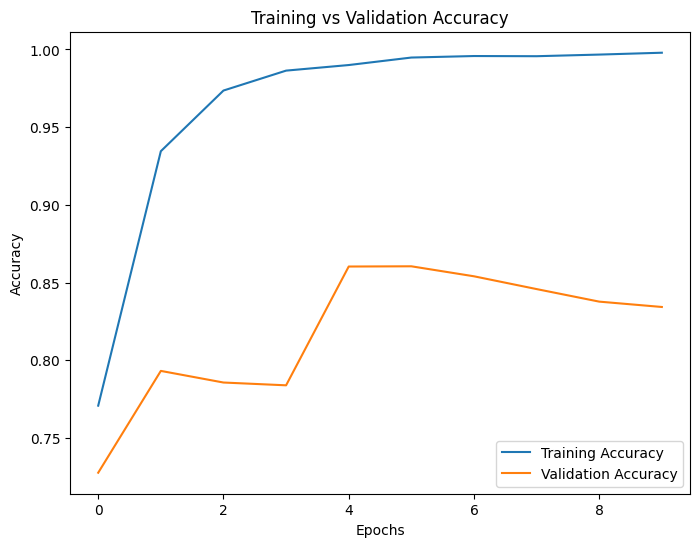

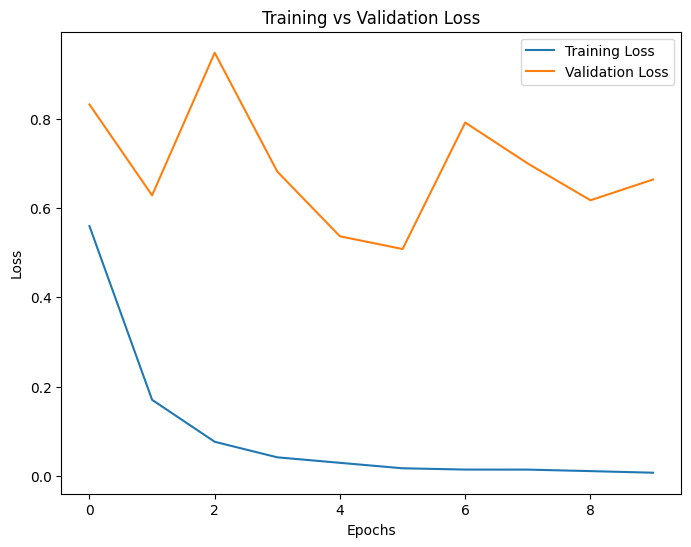

In [14]:
# رسم دقة التدريب والتحقق
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# رسم فقدان التدريب والتحقق
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()